# AirBnb Data Analysis- New York, United States


This notebook is using housing data from [Inside Airbnb](http://insideairbnb.com/get-the-data.html). I will be investigating several features of the AirBnb listing data in order to gain more insights on the trends of Airbnb housing in New York.


The data contains the following files:
- listings.csv
- reviews.csv


The following areas of investigation are: 

### Price:
   
- How does the price distribution in New York look like?
- What are the different room types available and how does their price differ?
- How does the area or neighberhood affect the price?
- Does the "minimum night" feature affect the price?
    
### Demand:
   
- How does the demand fluctuate for AirBnb in New York with regards to months of the year?
- Is there a certain season where demand for housing increase?

## Import dataset 

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

listings = pd.read_csv('listings.csv')
reviews = pd.read_csv('reviews.csv')

listings.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2060,Modern NYC,2259,Jenny,Manhattan,Washington Heights,40.85722,-73.93790,Private room,100,1,1,2008-09-22,0.01,1,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,3,48,2019-11-04,0.37,2,361
2,3831,"Whole flr w/private bdrm, bath & kitchen(pls r...",4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,327,2020-06-21,4.65,1,295
3,5054,Midtown West,7231,Tom,Manhattan,Hell's Kitchen,40.76551,-73.98631,Entire home/apt,150,1,58,2016-12-23,0.42,1,87
4,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,78,2019-10-13,0.57,1,0


In [4]:
#checking amount of rows in given dataset to understand the size we are working with
len(listings)

48588

In [5]:
#checking the names and type of every column in the dataset
listings.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

## Cleaning the data

In [6]:
listings.isnull().sum()

id                                    0
name                                 18
host_id                               0
host_name                            12
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       11358
reviews_per_month                 11358
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [7]:
#We can see that there aren't many missing data. By the nature of the dataset, we can drop the "name","host_name"
# and "last_review" colomns as they are not relevant to the analysis. 

#last_review is the date for the last review, if listing has no reviews then date will not exist, 
#then there is no need to add value to the missing parts  

listings.drop(['host_name','name', 'last_review'], axis=1, inplace=True)


In [8]:
# Let's try to get more information on the missing values of "reviews_per_month" colomn
listings[listings['reviews_per_month'].isnull()]

,id,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
17,7750,17985,Manhattan,East Harlem,40.79685,-73.94872,Private room,130,14,0,NaN,2,178
20,8700,26394,Manhattan,Inwood,40.86754,-73.92639,Private room,80,4,0,NaN,1,0
27,11943,45445,Brooklyn,Flatbush,40.63702,-73.96327,Private room,150,1,0,NaN,1,365
89,25793,108326,Brooklyn,Clinton Hill,40.68288,-73.96330,Entire home/apt,100,4,0,NaN,1,365
162,47322,213877,Manhattan,Upper East Side,40.77041,-73.95997,Entire home/apt,215,1,0,NaN,1,346
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48583,44103357,247439246,Manhattan,East Harlem,40.79319,-73.94360,Private room,40,30,0,NaN,5,363
48584,44103415,2420592,Brooklyn,Navy Yard,40.70231,-73.98032,Private room,75,6,0,NaN,2,365
48585,44103612,247439246,Brooklyn,Williamsburg,40.71414,-73.96376,Private room,45,30,0,NaN,5,364
48586,44103854,247439246,Brooklyn,Bushwick,40.69850,-73.93186,Entire home/apt,125,30,0,NaN,5,363


In [9]:
#We see that the missing values correspond to 0 "number_of_reviews" for the listing,
#then we can safely append 0.0 instead of the missing values in "reviews_per_month" column
listings.fillna({'reviews_per_month':0}, inplace=True)

## Analyzing some features

<AxesSubplot:>

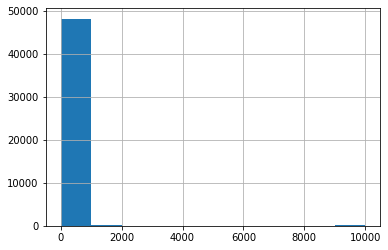

In [10]:
listings['price'].hist()

In [11]:
listings['price'].describe()

count    48588.000000
mean       165.583025
std        454.040569
min          0.000000
25%         67.000000
50%        100.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

<AxesSubplot:xlabel='price'>

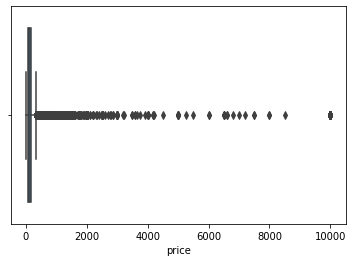

In [12]:
sns.boxplot(x = listings['price'])

<AxesSubplot:xlabel='price'>

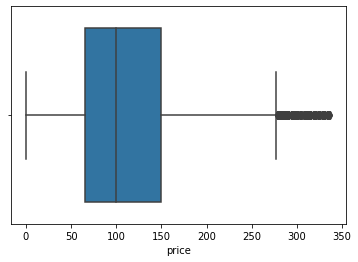

In [13]:
#We cas see lots of outliers in the data. we can use inter-quartile range to detect the outliers in the price column.
Q1 = listings['price'].quantile(0.25)
Q3 = listings['price'].quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range. 

filter = (listings['price'] >= Q1 - 1.5 * IQR) & (listings['price'] <= Q3 + 1.5 *IQR)
listings = listings.loc[filter]  

sns.boxplot(x = listings['price'])

### How does the price distribution in New York look like?

In [14]:
listings['price'].describe()

count    45738.000000
mean       117.548756
std         67.049917
min          0.000000
25%         65.000000
50%        100.000000
75%        150.000000
max        337.000000
Name: price, dtype: float64

<AxesSubplot:>

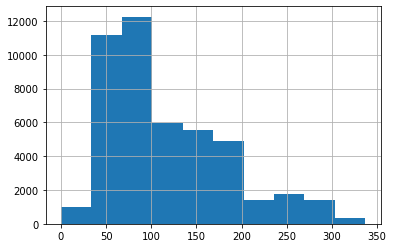

In [15]:
listings['price'].hist()

We can see that most listings range from few dollars per night to a 350 dollars per night , with the majority being around $80.


### What are the different room types available and how does their price differ?

In [16]:
#What are the different property types available and what is their count breakdown?
listings['room_type'].value_counts()

Entire home/apt    22824
Private room       21549
Shared room         1051
Hotel room           314
Name: room_type, dtype: int64

Most property types in New York are either entire home/apt or private rooms with few being shared and hotel rooms.

Let's check how the price of each type differ.

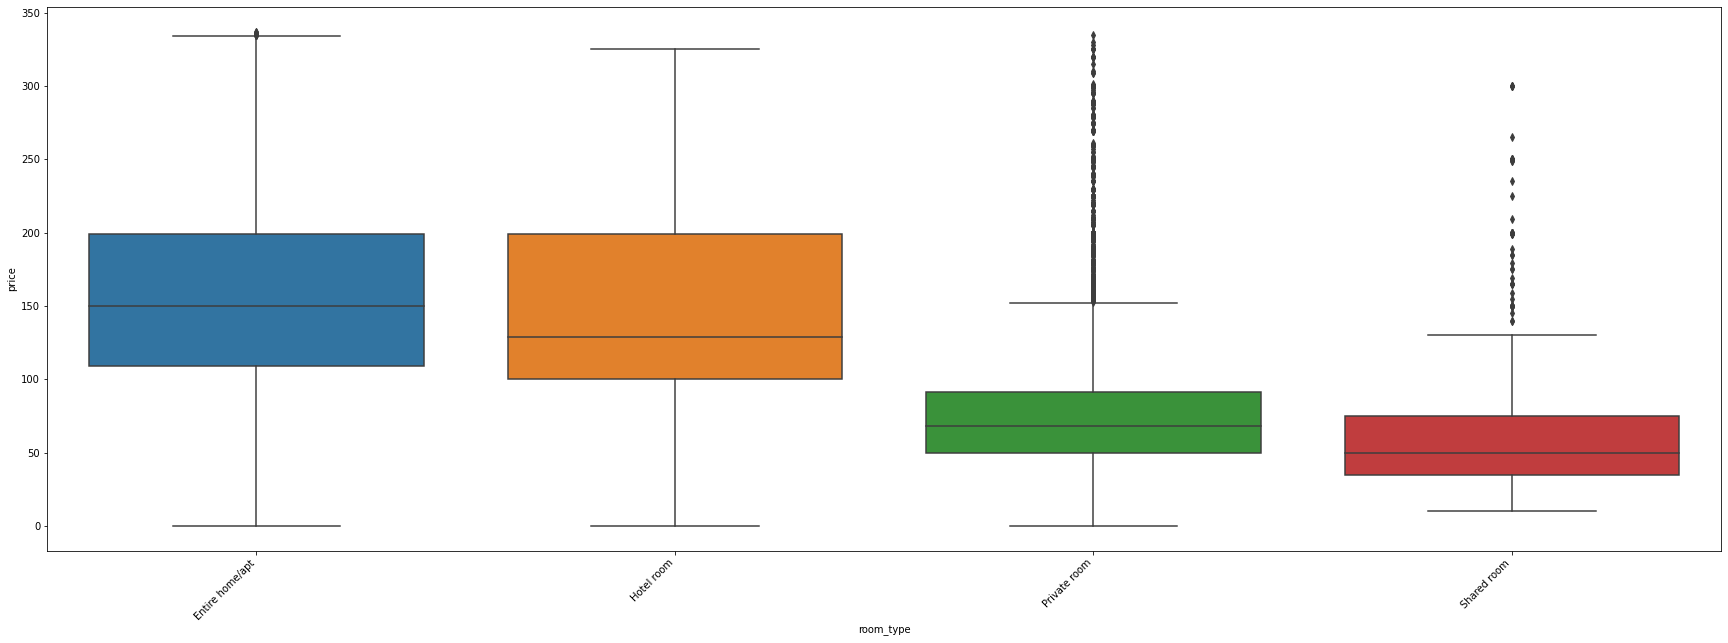

In [19]:
plt.figure(figsize=(30,10))
sort_price = listings\
                    .groupby('room_type')['price']\
                    .median()\
                    .sort_values(ascending=False)\
                    .index
sns.boxplot(y='price', x='room_type', data=listings, order=sort_price)
ax = plt.gca()
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.show();

The results are as expected. Entire home/apt and hotel rooms are the most expensive, while shared rooms are the least expensive with a median of around $50 per night. There is not a big difference between the median price of shared rooms and private rooms. 

### How does the area or neighberhood affect the price?

In [20]:
#What are the different neighberhood groups and what is their count breakdown?
listings['neighbourhood_group'].value_counts()

Manhattan        19503
Brooklyn         18849
Queens            5859
Bronx             1172
Staten Island      355
Name: neighbourhood_group, dtype: int64

We see the bulk of Airbnb listings are available in Manhattan and Brooklyn. This makes sense as Manhattan and Brooklyn are the most densely populated areas in the United States.

Let's examine the price distribution in Manhattan, Brooklyn and Queens and check whether prices can vary greatly within a single area.

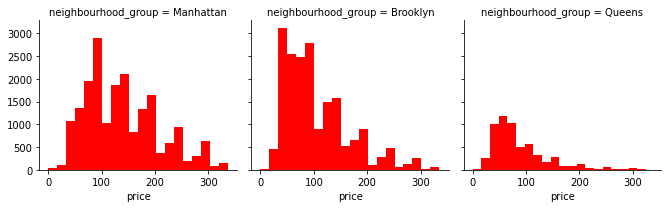

In [22]:
## What does the price distribution look like in Manhattan, Brooklyn and Queens?
neighberhood_groups = ['Manhattan','Brooklyn', 'Queens']
top_neighberhoods= listings[listings.neighbourhood_group.isin(neighberhood_groups)]
# Build histograms for each neighberhood
g = sns.FacetGrid(data = top_neighberhoods, col = 'neighbourhood_group', col_wrap = 10)
g.map(plt.hist, 'price', bins = 20, color = 'r')

From the above graphs we notice the following:
- Queens is the most consistent area with its price being on the low side of around $50.
- Manhattan however varies greatly in its prices and accomodates both cheap and expendsive listings. 
- Brooklyn shows a bigger spike in cheap listings but can still accomade the more expensive listings. 

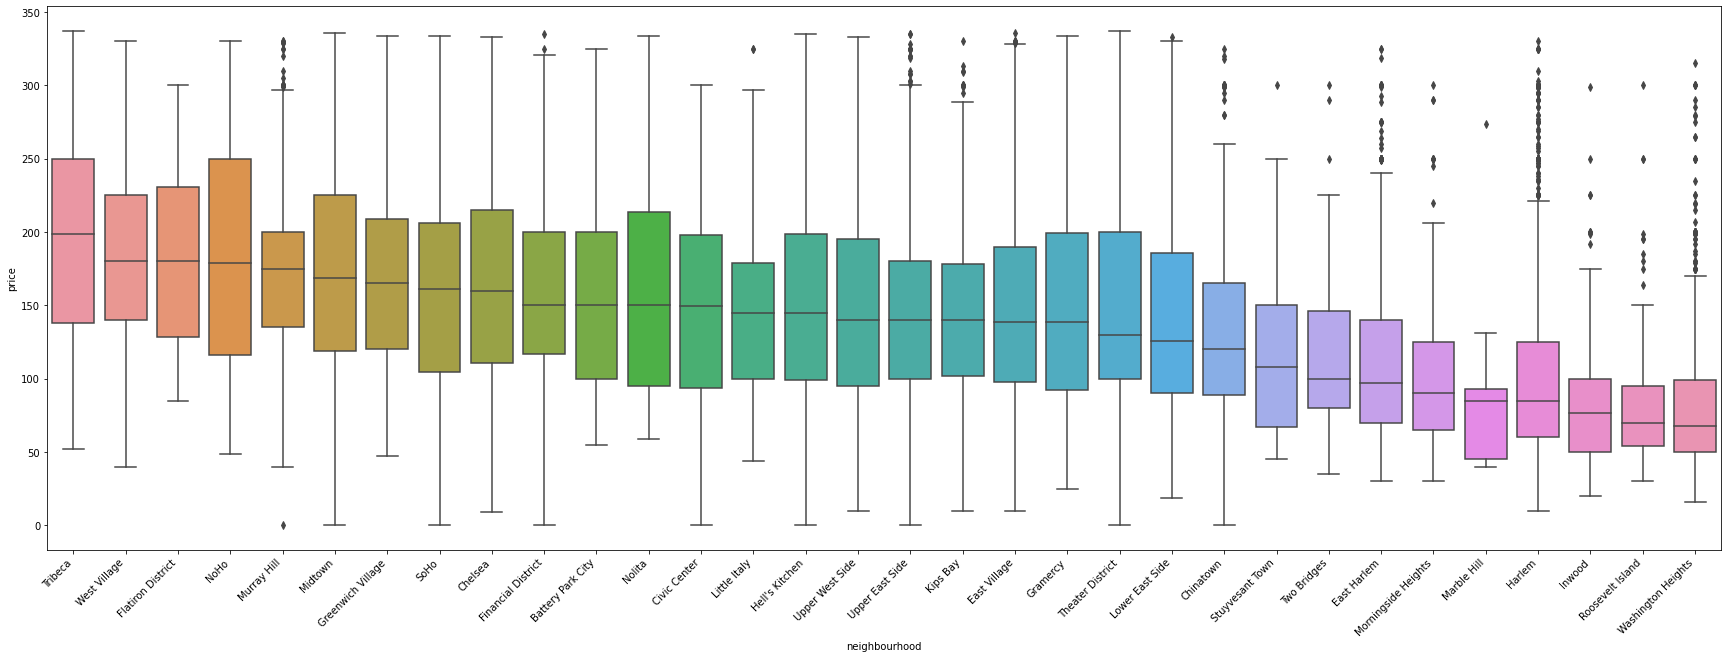

In [24]:
#Let's examine more of Manhattan and check whether there is a pattern in different areas of Manhattan
plt.figure(figsize=(30,10))
manhattan_listins= listings.loc[listings['neighbourhood_group'] == 'Manhattan']
sort_price = manhattan_listins\
                    .groupby('neighbourhood')['price']\
                    .median()\
                    .sort_values(ascending=False)\
                    .index
sns.boxplot(y='price', x='neighbourhood', data=listings, order=sort_price)
ax = plt.gca()
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.show();

From the above graph we can see that different areas of Manhattan also has wide range of prices. With exception of Roosvelt Island having a consistent price in the range of 70-90 dollars per night. 

The expensive listings are available in Tribeca and NoHo area. 
NoHo (North of Houston Street) is an upper-class trendy neighborhood where creative meets with lots of Architectural features and galleries so there is no surprise that alot of expensive listings are available in this area.


### Does the "minimum night" feature affect the price?

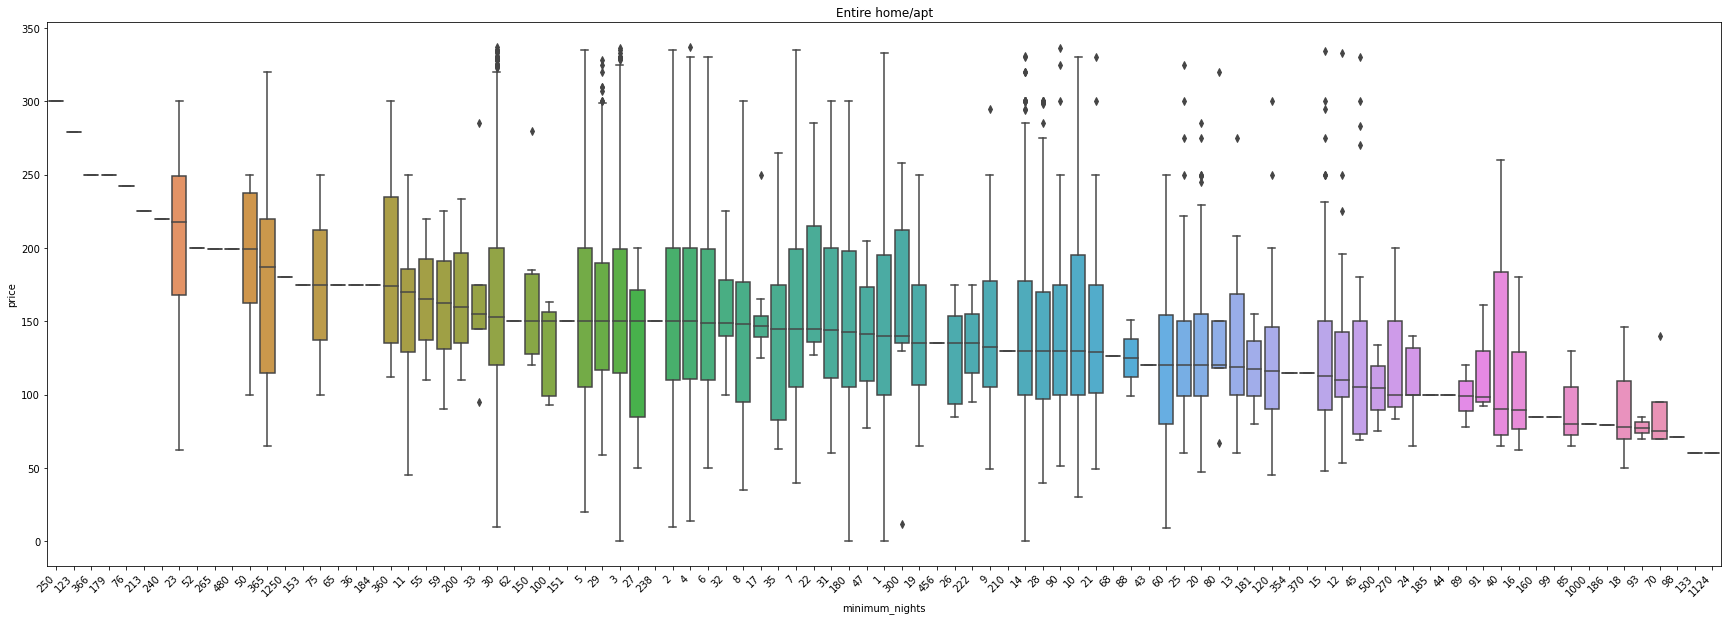

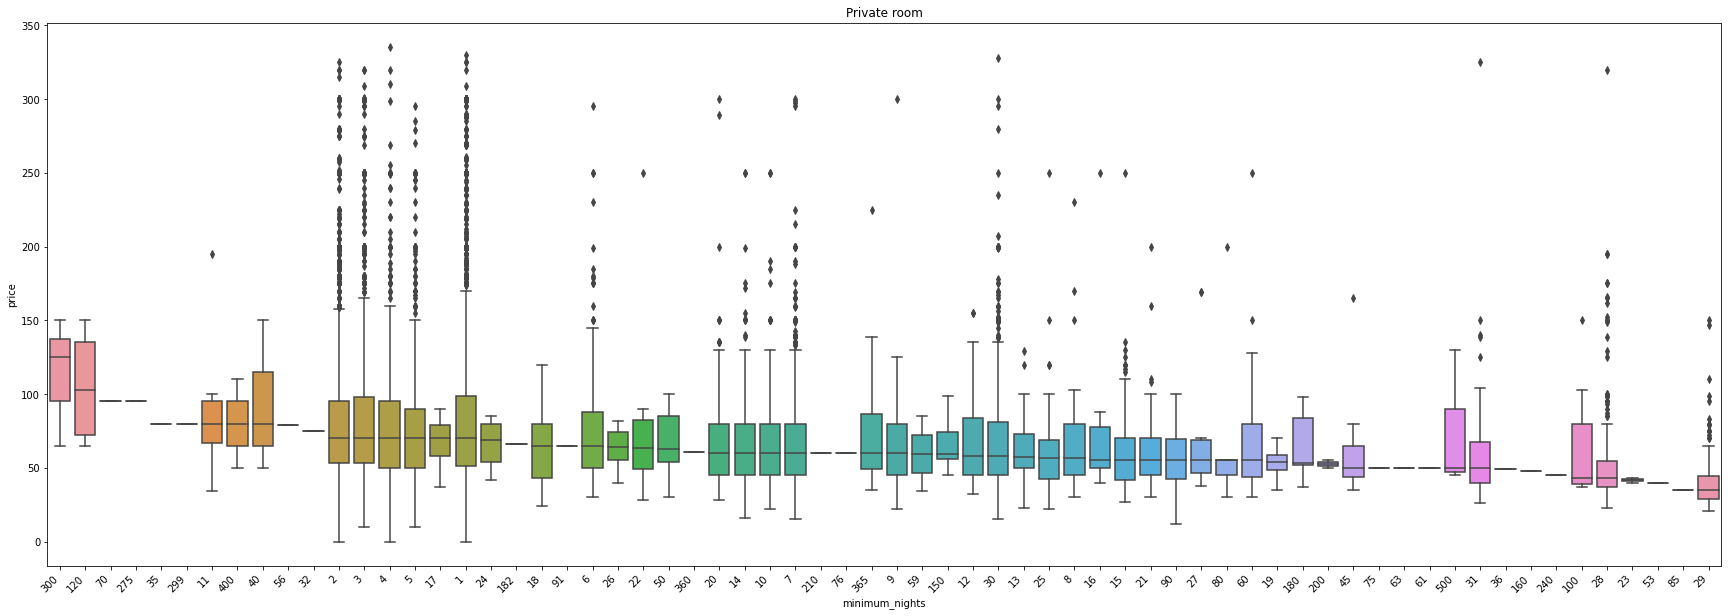

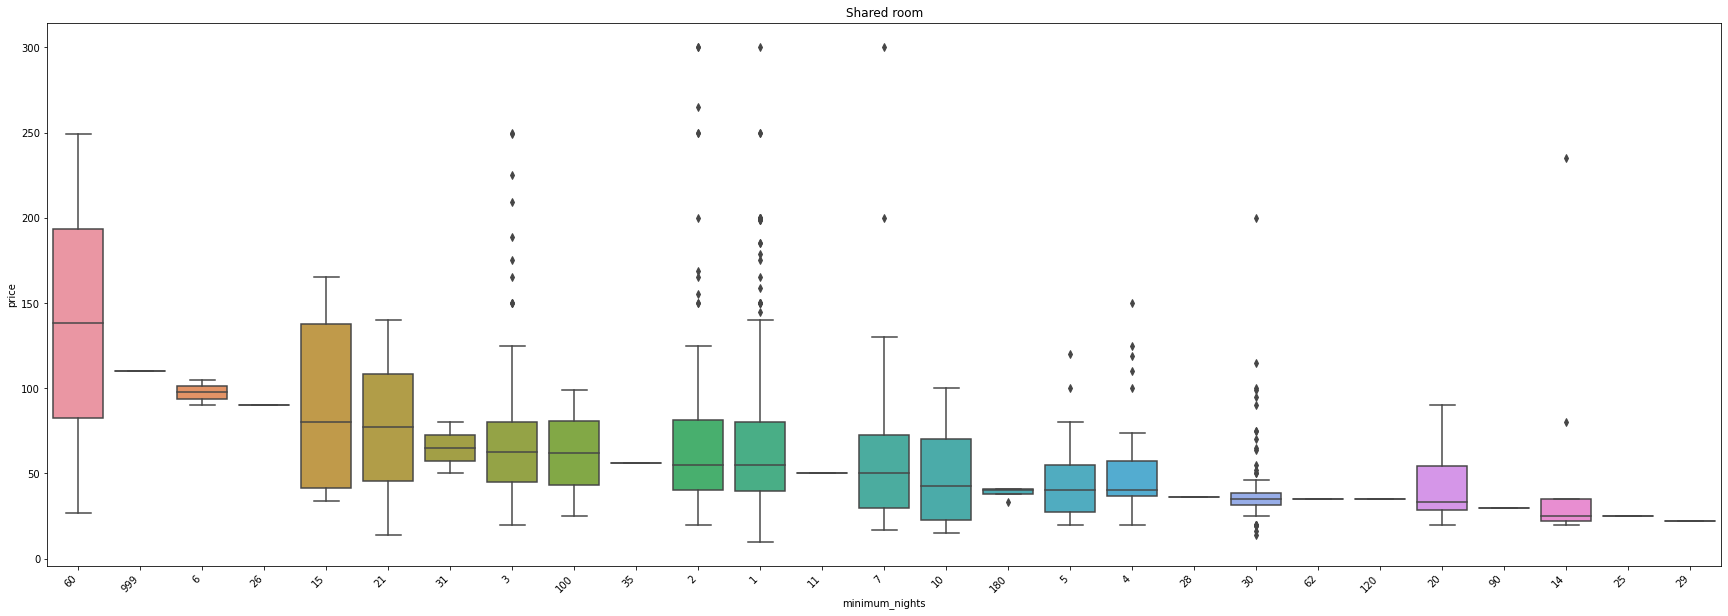

In [35]:
room_types = ['Entire home/apt','Private room', 'Shared room']
for room_type in room_types:
    listings_type= listings.loc[listings['room_type'] == room_type]
    plt.figure(figsize=(30,10))
    sort_price = listings_type.groupby('minimum_nights')['price'].median().sort_values(ascending=False).index
    sns.boxplot(y='price', x='minimum_nights' , data=listings_type, order=sort_price).set_title(room_type)
    ax = plt.gca()
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
    plt.show();

From the plots we see that as the minimum night requirement increase, the price decreases. this trend is most apparent in the room type: Entire home/apartment where we see a clear decrease in the median price as the minimum night requirements increase.

## Reviews.csv dataset

### How does the demand fluctuate for AirBnb in New York with regards to months of the year?

In order to analyze the demand, i will use the 'number_of_reviews' feature as an indicator for the average number of bookings. Airbnb claims that 50% of those who book, write a review so this is a fair estimation for the demand.


In [41]:
 Change the date to datetime
reviews['date'] = pd.to_datetime(reviews['date'])
#Now that the Date column is the correct data type, let’s set it as the DataFrame’s index
reviews = reviews.set_index('date')

# Add columns with year, month
reviews['Year'] = reviews.index.year
reviews['Month'] = reviews.index.month

reviews.head()

,listing_id,Year,Month
date,,,
2008-09-22,2060,2008,9
2009-11-21,2595,2009,11
2009-12-05,2595,2009,12
2009-12-10,2595,2009,12
2010-04-09,2595,2010,4


Text(0.5, 1.0, 'Number of Reviews across Years')

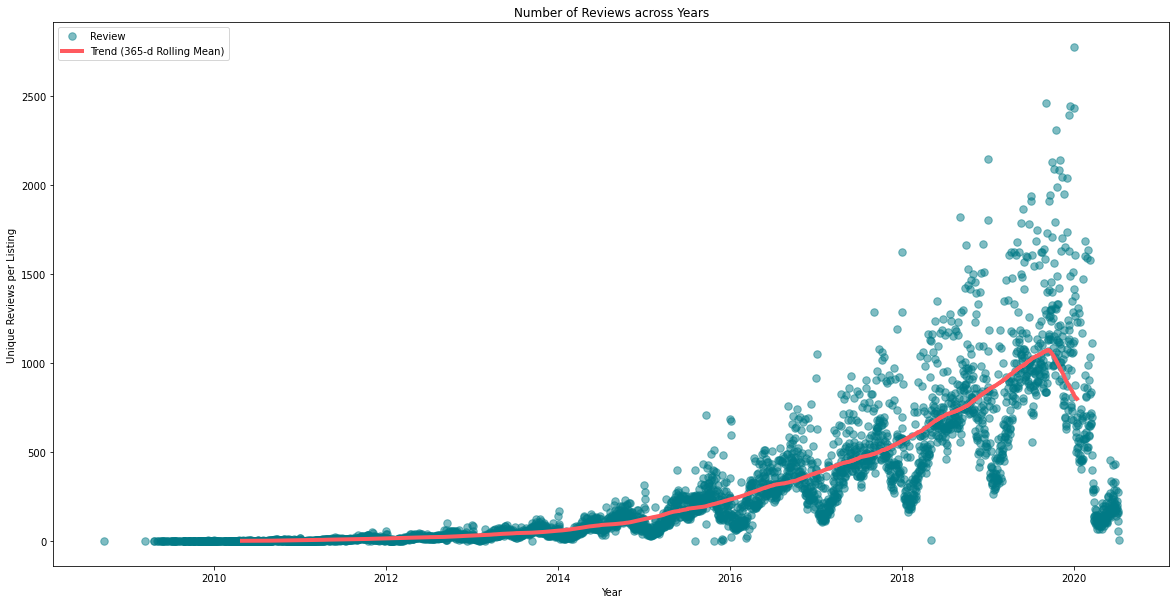

In [42]:


counts = reviews.groupby([reviews.index.date]).count()
mean_365d = counts['listing_id'].rolling(window=365,center =True, min_periods=360).mean()
# Plot Figure
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(counts['listing_id'], marker='.', markersize=15, color='#017A86',alpha=0.5, linestyle='None', label='Review')
ax.plot(mean_365d, linewidth=4, color='#FF5A5F',label = 'Trend (365-d Rolling Mean)')
# Set legend and labels
ax.legend()
ax.set_xlabel('Year')
ax.set_ylabel('Unique Reviews per Listing')
ax.set_title('Number of Reviews across Years')

We can the increase in demand for Airbnb listings in New york in the last 10 years. As Airbnb is becoming more famous, alot of people are becoming more dependent on it for their travel and accomodation. The sharp decrease in demand in 2020 is ofcourse due to the Covid 19 pandemic situation.

## Is there a certain season where demand for housing increase?

Let's check if there is a certain month or season that airbnb demand forsees a large increase. 
To do this, we will need to closely examine some years. 

We will run the tests on years 2019 and 2018 to check the demand accros each month in the year.

/home/shahed/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  


Text(0.5, 1.0, 'Number of Reviews across Weeks of 2019')

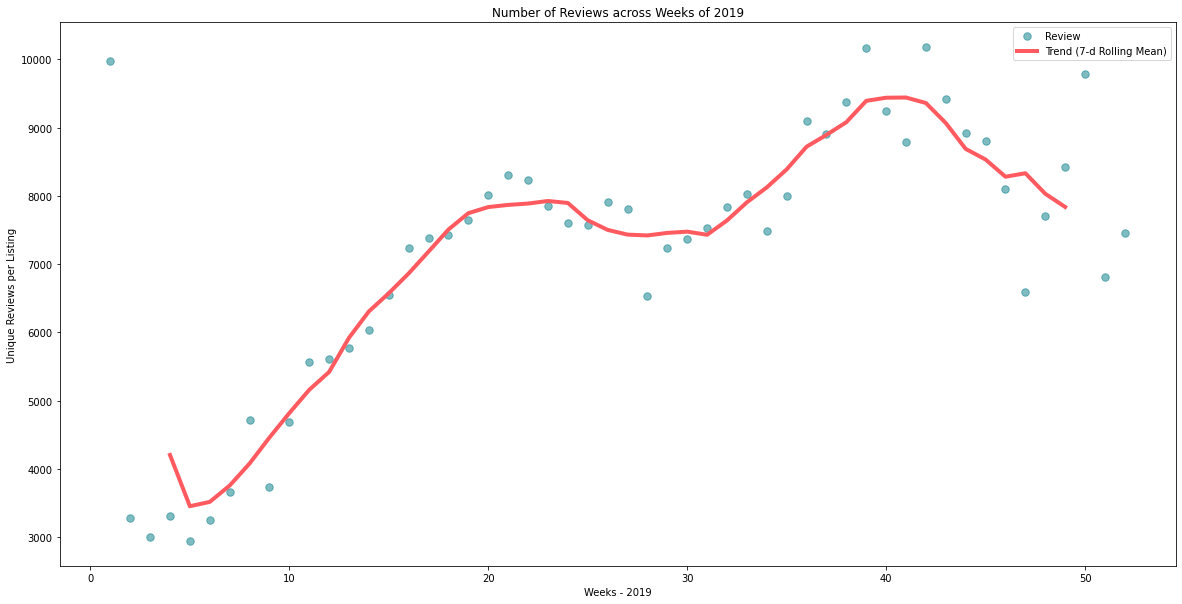

In [45]:

yeardf = reviews.loc['2019']
year_month_counts = yeardf.groupby([yeardf.index.week]).count()
year_month_mean_7d = year_month_counts['listing_id'].rolling(7,center =True).mean()


fig, ax = plt.subplots(figsize=(20,10))
ax.plot(year_month_counts['listing_id'], marker='.', markersize=15, color='#017A86',alpha=0.5, linestyle='None', label='Review')
ax.plot(year_month_mean_7d, linewidth=4, color='#FF5A5F',label = 'Trend (7-d Rolling Mean)')
# Set legend and labels
ax.legend()
ax.set_xlabel('Weeks - 2019')
ax.set_ylabel('Unique Reviews per Listing')
ax.set_title('Number of Reviews across Weeks of 2019')

/home/shahed/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  


Text(0.5, 1.0, 'Number of Reviews across Weeks of 2018')

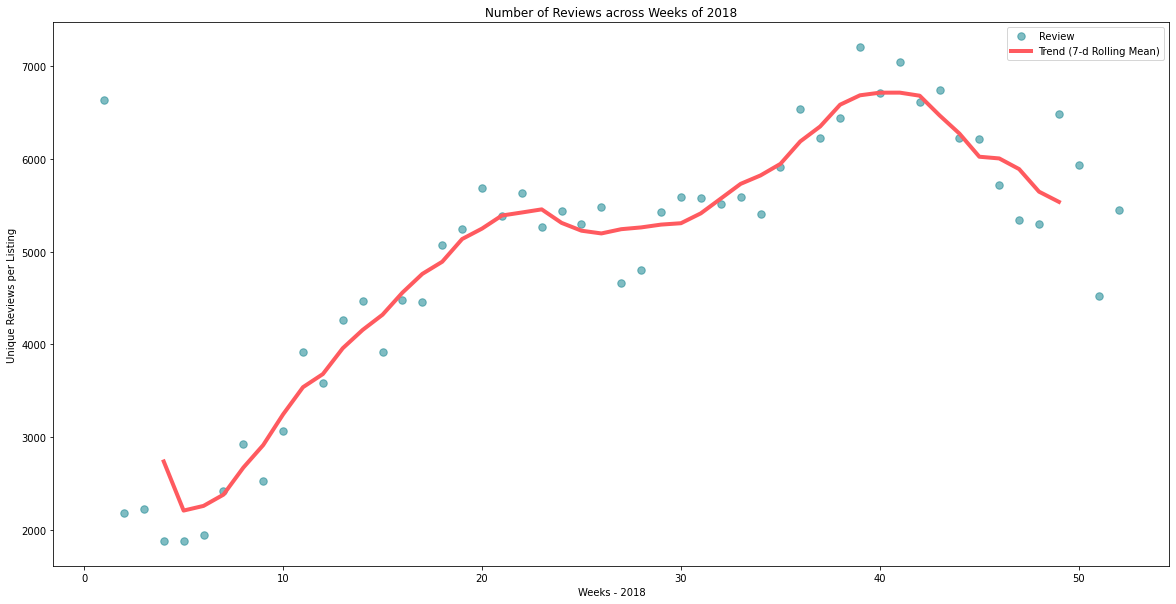

In [46]:
yeardf = reviews.loc['2018']
year_month_counts = yeardf.groupby([yeardf.index.week]).count()
year_month_mean_7d = year_month_counts['listing_id'].rolling(7,center =True).mean()


fig, ax = plt.subplots(figsize=(20,10))
ax.plot(year_month_counts['listing_id'], marker='.', markersize=15, color='#017A86',alpha=0.5, linestyle='None', label='Review')
ax.plot(year_month_mean_7d, linewidth=4, color='#FF5A5F',label = 'Trend (7-d Rolling Mean)')
# Set legend and labels
ax.legend()
ax.set_xlabel('Weeks - 2018')
ax.set_ylabel('Unique Reviews per Listing')
ax.set_title('Number of Reviews across Weeks of 2018')

Looking at the two graphs, a similar trend appears. At the week 40 of the year the demand reaches its peak, while the least demand occurs at the first few weeks of the year.